# Exercise 10: Tests
# Duy Tommy Tran

#### Importing library

In [1]:
import numpy as np
import pandas as pd
import math
from scipy import stats
from scipy import optimize

from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib notebook
%matplotlib inline

In [2]:
# Defining some figure parameters
mpl.rcParams.update({'figure.figsize': (10.0, 7),                   # Figuresize
                     'legend.fontsize': 17, 'legend.handlelength': 3, # Legend
                     'xtick.labelsize': 15, 'ytick.labelsize': 15,    # Tick-sizes of the axes
                     'font.size': 15})                                # Fontsize

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [3]:
# Observations
x0 = 15

# Poisson distribution
mu = 6.3
sigma_mu = np.sqrt(mu)

# Z-test
def Z(x0, mu, sigma_mu):
    return (x0-mu)/sigma_mu

Z = Z(x0, mu, sigma_mu)
print(f'Z score: {Z}')

print('\nIt is statistically significant since the Z scores are similar.')

Z score: 3.4661629670697414

It is statistically significant since the Z scores are similar.


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [4]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

n = len(pre)

# Mean
mean_pre = np.mean(pre)
mean_post = np.mean(post)

# Variance (sigma)
var_pre = np.var(pre, ddof=1)   #sigma^2
var_post = np.var(post, ddof=1)
sigma = np.sqrt((var_pre + var_post)/2)

# T-test
T = (mean_pre - mean_post)/(sigma*np.sqrt(2/n))
print(f'T: {T}')

# p-value
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print(f'p-value: {pvalue}')

print('\nThe p-value is small, which makes this analysis statistically significant.')

T: -3.786997938137629
p-value: 0.004302464132864604

The p-value is small, which makes this analysis statistically significant.


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

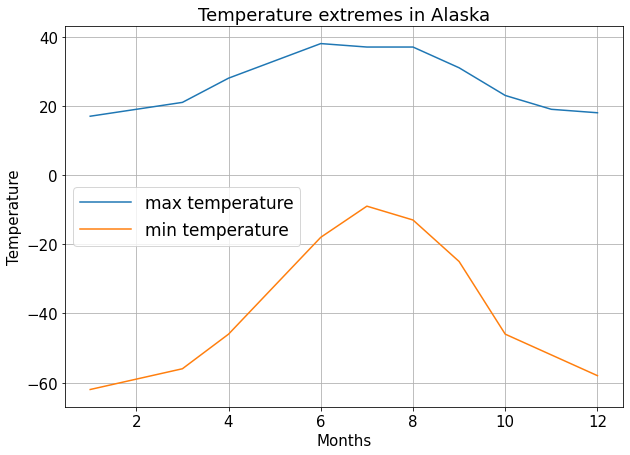

In [5]:
max_temp = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
min_temp = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
t = np.arange(1,13)

plt.title('Temperature extremes in Alaska')
plt.plot(t, max_temp, label = 'max temperature')
plt.plot(t, min_temp, label = 'min temperature')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.legend()
plt.grid()
plt.show()

Maximum temperatures:
A = -10.58 +- 0.41
f = 0.59 +- 0.02
phi = 0.73 +- 0.15
c = 27.95 +- 0.43

Minimum temperatures:
A = -25.15 +- 1.31
f = 0.60 +- 0.02
phi = 0.42 +- 0.16
c = -36.71 +- 1.19


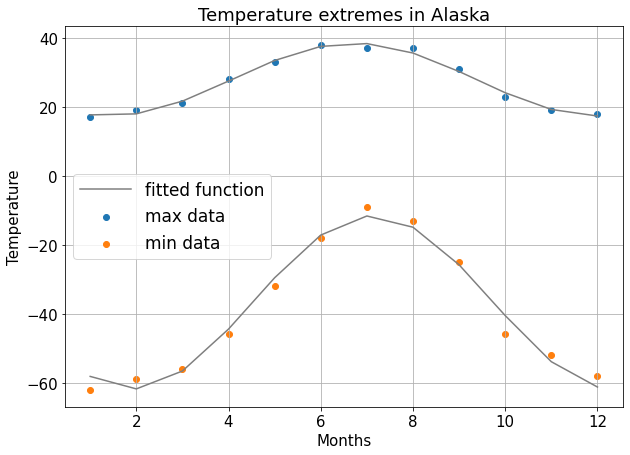

In [6]:
def f(x, A, w, phi, c):
    return A * np.sin(w*t + phi) + c

def show_parameters(popt, pcov):
    print('A = %.2f +- %.2f' % (popt[0], np.sqrt(pcov[0,0])))
    print('f = %.2f +- %.2f' % (popt[1], np.sqrt(pcov[1,1])))
    print('phi = %.2f +- %.2f' % (popt[2], np.sqrt(pcov[2,2])))
    print('c = %.2f +- %.2f' % (popt[3], np.sqrt(pcov[3,3])))


# Display plot and parameters
print('Maximum temperatures:')
popt, pcov = optimize.curve_fit(f, t, max_temp, p0=[10, np.pi/6, (2*np.pi)/12, 17], full_output=False) # w = 2pi/T
show_parameters(popt, pcov)
plt.plot(t, f(t, popt[0], popt[1], popt[2], popt[3]), color='tab:gray', label='fitted function')
plt.scatter(t, max_temp, label='max data')

print('\nMinimum temperatures:')
popt, pcov = optimize.curve_fit(f, t, min_temp, p0=[30, np.pi/6, (2*np.pi)/12, -62], full_output=False) # w = 2pi/T
show_parameters(popt, pcov)
plt.plot(t, f(t, popt[0], popt[1], popt[2], popt[3]), color='tab:gray')
plt.scatter(t, min_temp, label='min data')

plt.title('Temperature extremes in Alaska')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.legend()
plt.grid()
plt.show()

In [7]:
print('The fit is reasonable. We see that the data fluctuate following a sinusoidal wave, displaying periodic variations in temperature during the year.')
print('The parameter phi is the time offset, and they are not the same for the maximum temperatures and the minimum temperatures.')

The fit is reasonable. We see that the data fluctuate following a sinusoidal wave, displaying periodic variations in temperature during the year.
The parameter phi is the time offset, and they are not the same for the maximum temperatures and the minimum temperatures.


4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

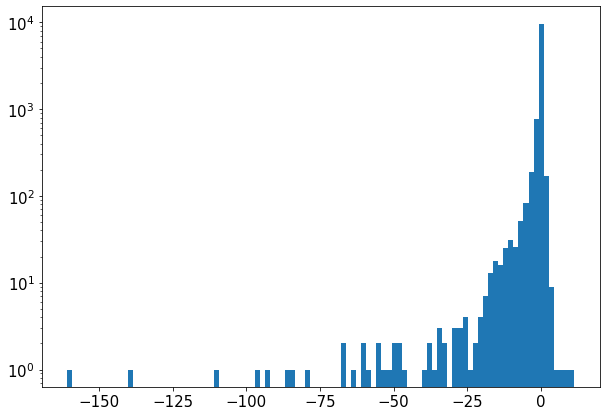

In [8]:
pickle_file = pd.read_pickle("./data/residuals_261.pkl")
df = pd.DataFrame(pickle_file.item())
#display(df)
residuals = df['residuals']

plt.figure()
plt.hist(residuals, 100)
plt.yscale('log')
plt.show()

In [9]:
def exp(x, a, b, c):
    return a*np.exp(b*x) + c

x = np.linspace(-150,0, len(residuals))

popt, pcov = optimize.curve_fit(exp, x, residuals, p0=[1,1,1], full_output=False)

'''plt.plot(x, exp(x, *popt), color='red', label='fitted function with exp')
plt.plot(x, exp(x, *popt), 'r-')
plt.hist(residuals, 50)
plt.yscale('log')
plt.show()'''

print('Im struggling to do this one. I would expect a function that is similar to a gamma distribution or exponential function to fit put I cannot make it work.')

Im struggling to do this one. I would expect a function that is similar to a gamma distribution or exponential function to fit put I cannot make it work.


/var/folders/mg/rv9t79g56qq1l8f8ql0v0b8r0000gn/T/ipykernel_11033/337703131.py:2: RuntimeWarning: overflow encountered in exp
  return a*np.exp(b*x) + c


5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [10]:
#!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P data/

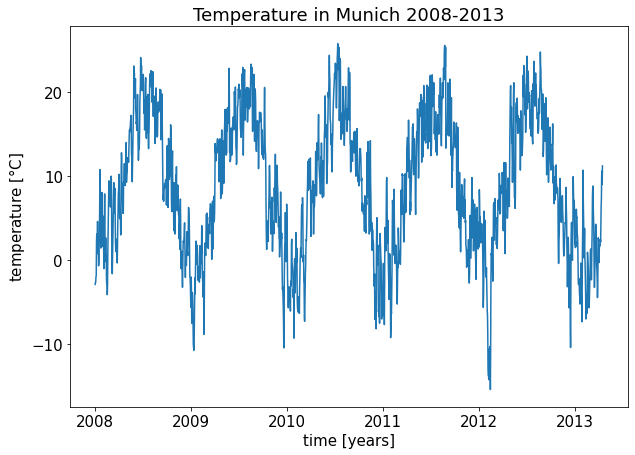

In [11]:
file_name = './data/munich_temperatures_average_with_bad_data.txt'
df = np.loadtxt(file_name)
#display(df)

data_range = df[df[:,0] >= 2008] 
data_range = data_range[data_range[:,1] < 99]

t = data_range[:,0]
temp = [i[1] for i in data_range]

plt.title('Temperature in Munich 2008-2013')
plt.plot(t, temp)
plt.xlabel('time [years]')
plt.ylabel('temperature [$\degree$C]')
plt.show()

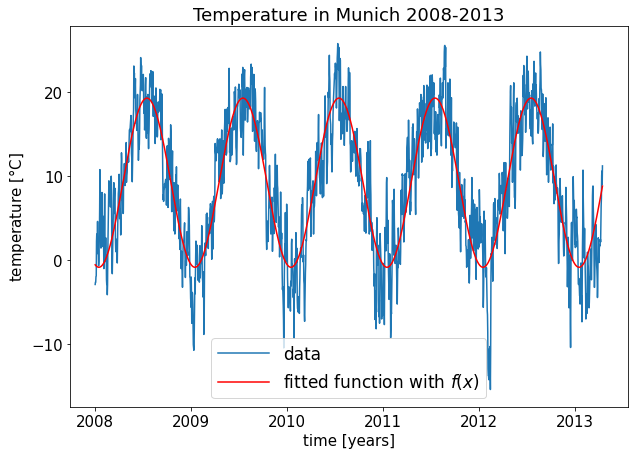

Best fitted values for the parameters:
a = -10.07 +- 0.12
b = -0.26 +- 0.01
c = 9.17 +- 0.09

Overall average temperature:
c = 9.17

Daily average temperature for coldest time:
c + a = -0.90

Daily average temperature for hottest time:
c - a = 19.24

b is the phase-parameter that shifts the plot along the x-axis.
The physical sense of it is how the typical temperature for a specific time of the year is delayed/early.


In [12]:
def f(t, a, b, c):
    return a*np.cos(2*np.pi*t + b) + c

popt_f, pcov_f = optimize.curve_fit(f, t, temp, p0=[10, 0, 0], full_output=False)

plt.title('Temperature in Munich 2008-2013')
plt.plot(t, temp, label='data')
plt.plot(t, f(t, *popt_f), color='red', label='fitted function with $f(x)$')
plt.xlabel('time [years]')
plt.ylabel('temperature [$\degree$C]')
plt.legend()
plt.show()

print('Best fitted values for the parameters:')
print('a = %.2f +- %.2f' % (popt_f[0], np.sqrt(pcov_f[0,0])))
print('b = %.2f +- %.2f' % (popt_f[1], np.sqrt(pcov_f[1,1])))
print('c = %.2f +- %.2f' % (popt_f[2], np.sqrt(pcov_f[2,2])))

print('\nOverall average temperature:')
print('c = %.2f' % (popt_f[2]))

print('\nDaily average temperature for coldest time:')
print('c + a = %.2f' % (popt_f[2]+popt_f[0]))

print('\nDaily average temperature for hottest time:')
print('c - a = %.2f' % (popt_f[2]-popt_f[0]))

print('\nb is the phase-parameter that shifts the plot along the x-axis.')
print('The physical sense of it is how the typical temperature for a specific time of the year is delayed/early.')

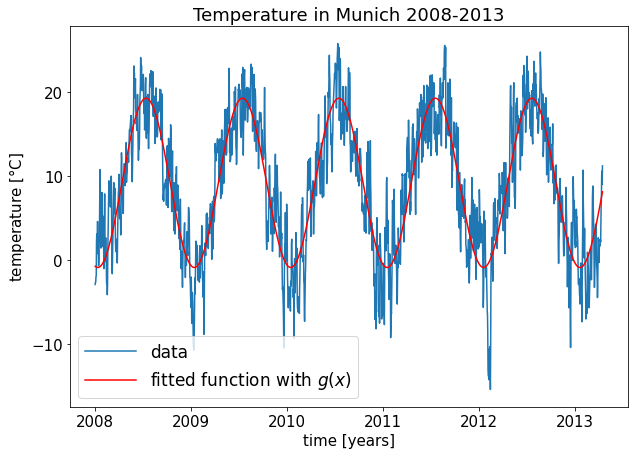

In [13]:
def g(t, a, b, c, d):
    return a*np.cos(2*np.pi*b*t + c) + d

popt_g, pcov_g = optimize.curve_fit(g, t, temp, p0=[-10, 1, 10, 1]) 

plt.title('Temperature in Munich 2008-2013')
plt.plot(t, temp, label='data')
plt.plot(t, g(t, *popt_g), color='red', label='fitted function with $g(x)$')
plt.xlabel('time [years]')
plt.ylabel('temperature [$\degree$C]')
plt.legend()
plt.show()

In [14]:
res_f = temp - f(t, *popt_f)
ssr_f = np.sum(res_f**2)

res_g = temp - g(t, *popt_g)
ssr_g = np.sum(res_g**2)

print(f'RSS of f(x): {ssr_f}')
print(f'RSS of g(x): {ssr_g}')

RSS of f(x): 26798.168770933255
RSS of g(x): 26659.177204769258


In [15]:
alpha = 0.05

# F-test taken from lecture notes
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("p-value: %.3f" % pval, ", additional parameter necessary:", "YES" if pval < alpha else "NO")
    return pval

n_f = 3
n_g = 4
N = n_f + n_g

Ftest(ssr_f, ssr_g, n_f, n_g, N, verbose = True)

p-value: 0.908 , additional parameter necessary: NO


0.908383033133649